In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

# metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# for save Python objects to a file
import pickle

# others
import warnings
from scipy.stats import uniform

warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

random_state = 42
np.random.seed(random_state)

In [24]:
# load data
df = pd.read_csv('employee_data.csv')

# dataset information
print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe().T)

Shape of dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel         

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Total Missing values: 0

Categorical features unique values:


BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64


Categorical features values:
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


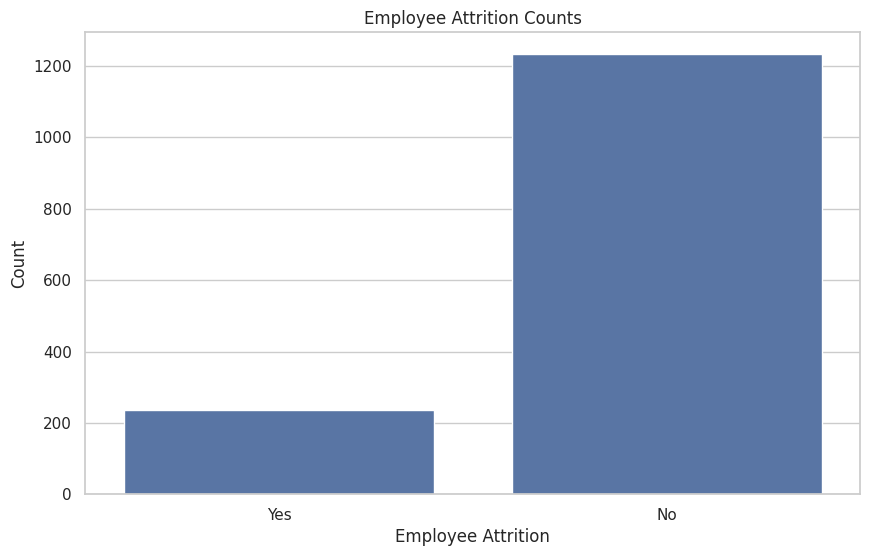

In [25]:
# EmployeeNumber is just like a EmployeeId, so drop this column
# EmployeeCount and StandardHours has no variation, so drop this column
df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber'], inplace=True, errors='ignore')

# target and feature columns
target_col = "Attrition"

categorical_cols = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime',  
]
numeric_cols = list(df.select_dtypes(include = ['int64','float64']).columns)


# basic information
print('Total Missing values:', df.isnull().sum().sum())
print('\nCategorical features unique values:')
display(df[categorical_cols].nunique())

print('\nCategorical features values:')
for c in categorical_cols:
  print(f'{c}: {df[c].unique()}')

# class counts
sns.countplot(x=target_col, data=df)
plt.title("Employee Attrition Counts")
plt.xlabel("Employee Attrition")
plt.ylabel("Count")
plt.show()

In [26]:
# Ordinal Encoding for target column
order = {"Yes":1,"No":0}
df[target_col]=df[target_col].map(order).astype(int)

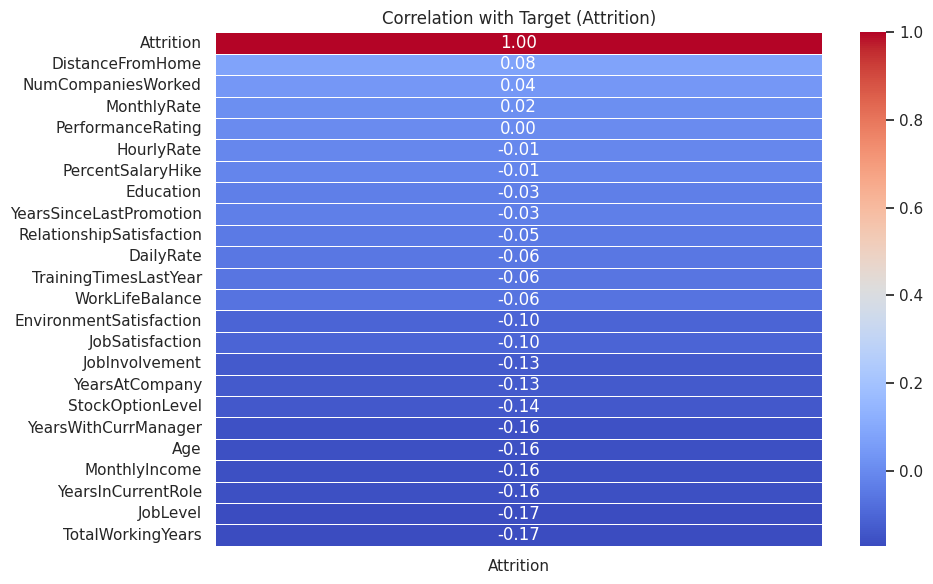

In [27]:
corr = df[numeric_cols + [target_col]].corr()

corr_attrition = corr[[target_col]].sort_values(by=[target_col], ascending=False)

sns.heatmap(corr_attrition, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title('Correlation with Target (Attrition)')
plt.tight_layout()
plt.show()

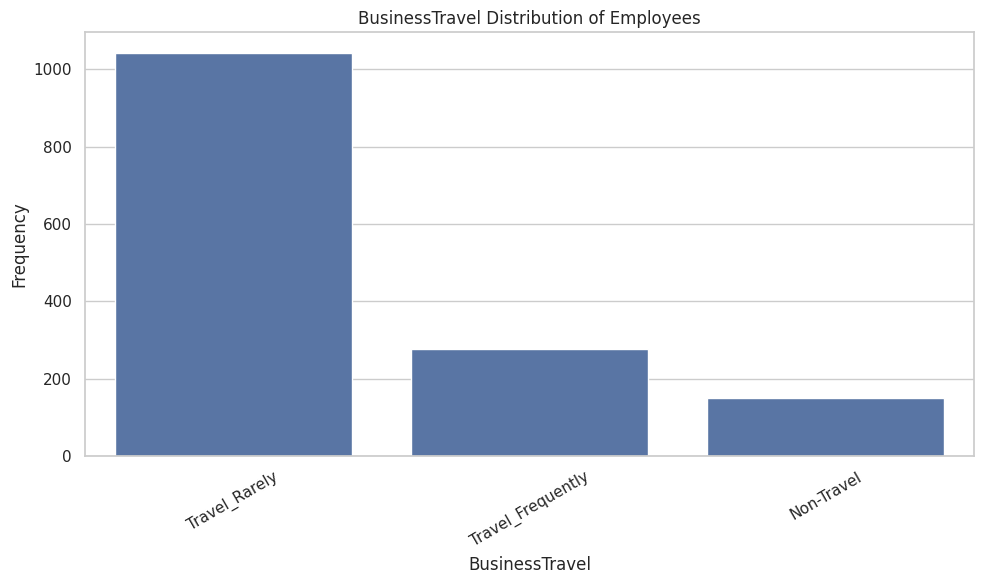

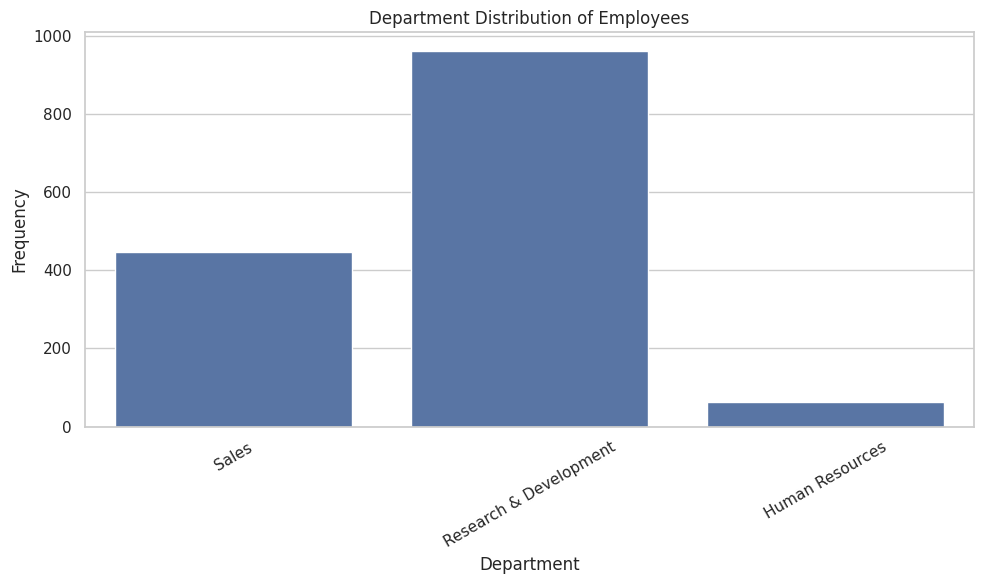

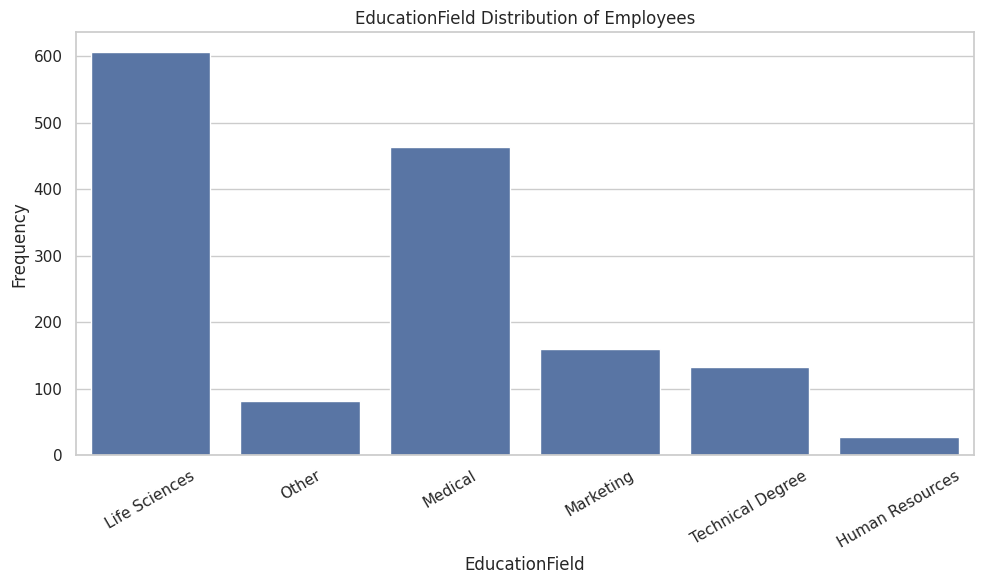

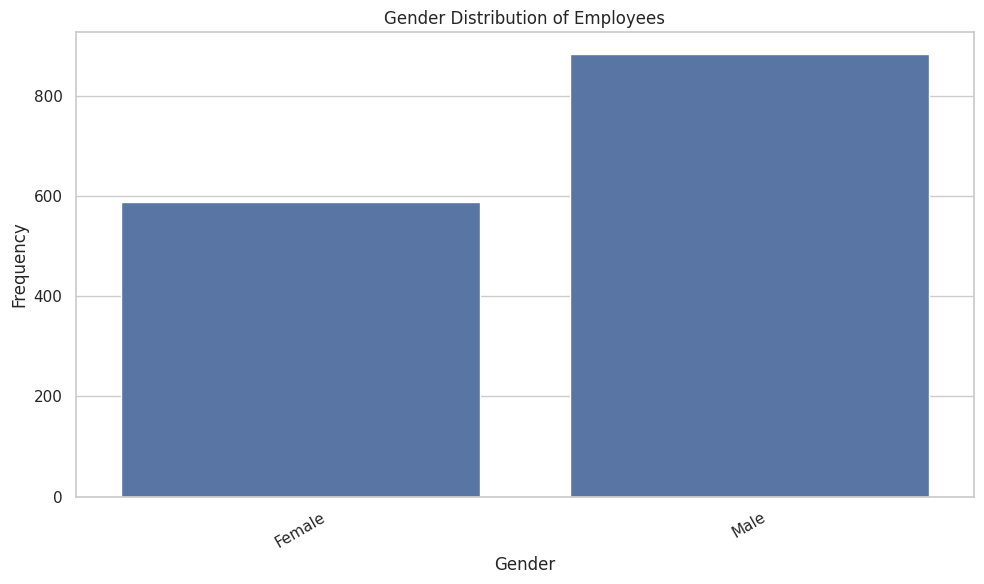

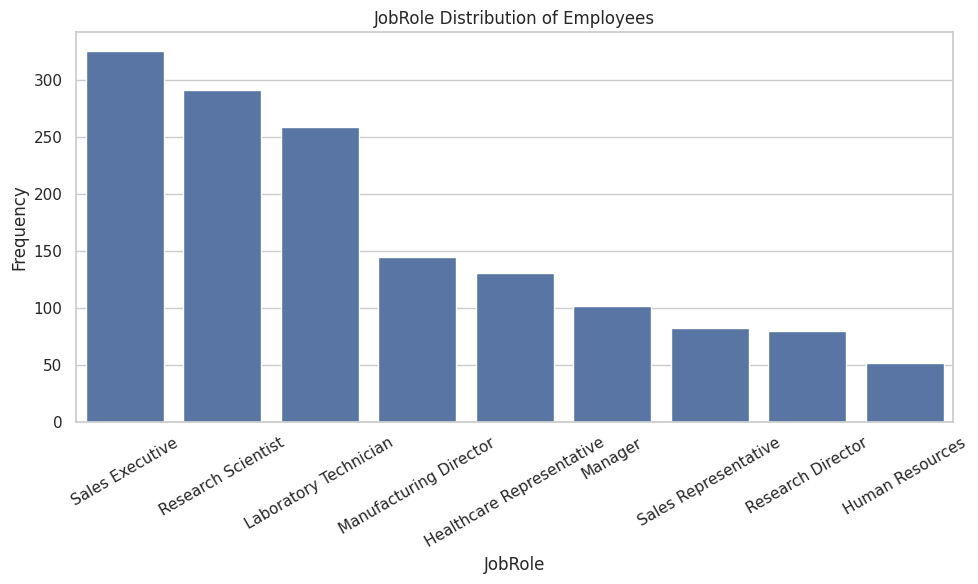

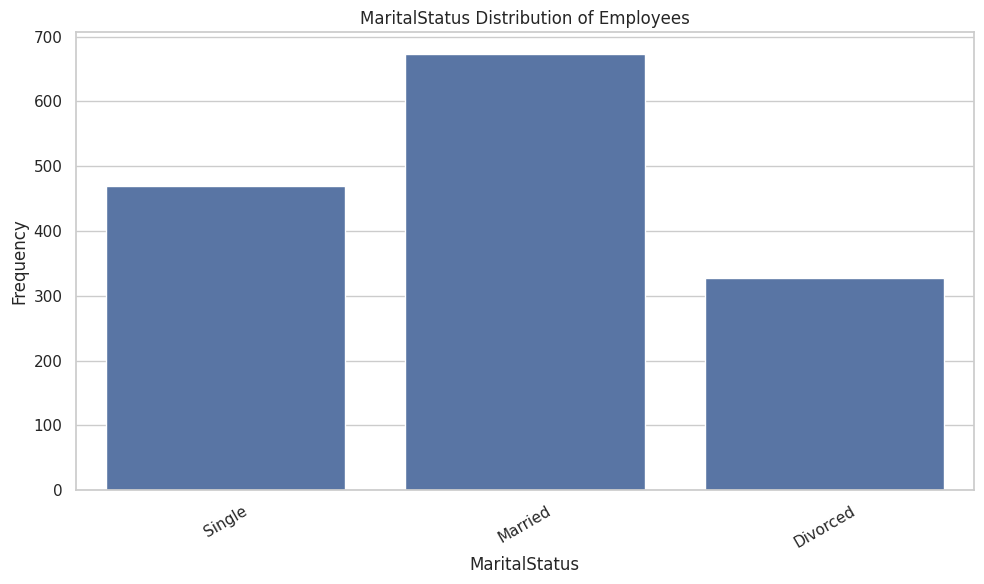

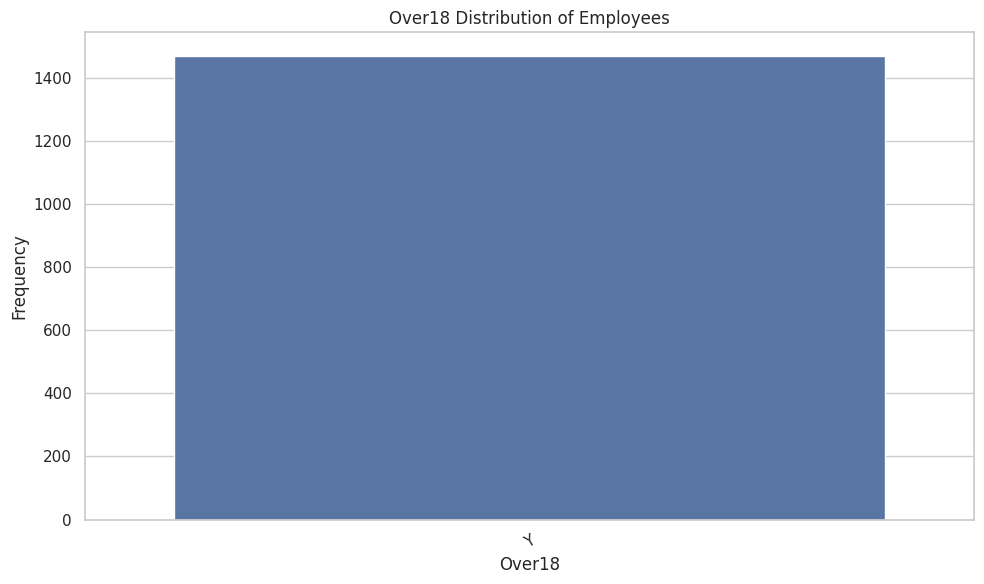

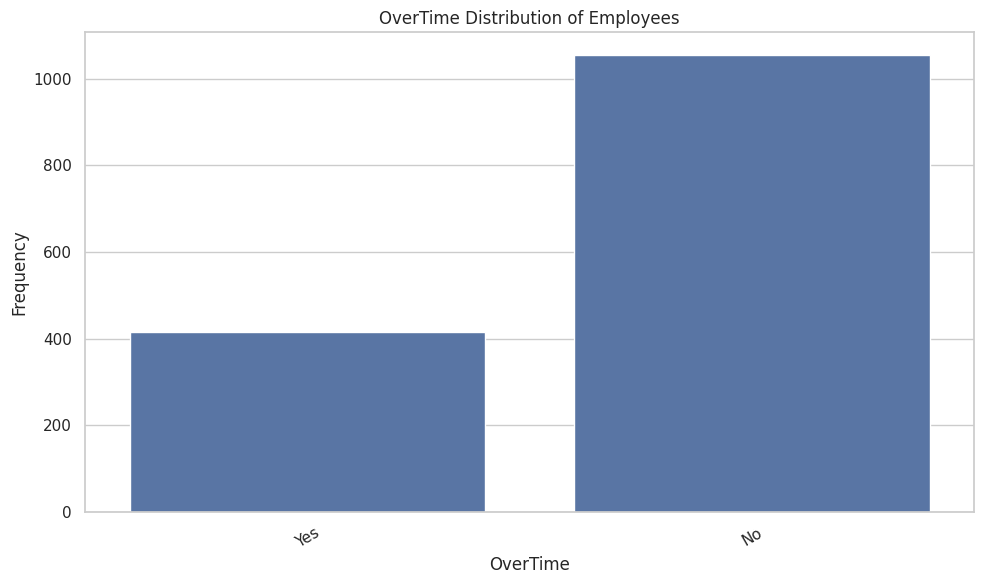

In [28]:
for c in categorical_cols:
    sns.countplot(data=df, x=c)
    plt.title(c + " Distribution of Employees")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [29]:
# Every employee is Over18, so drop this column
df.drop(columns=['Over18'], inplace=True, errors='ignore')

if "Over18" in categorical_cols:
    categorical_cols.remove("Over18")


Attrition proportion by BusinessTravel:


Attrition,0,1
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569


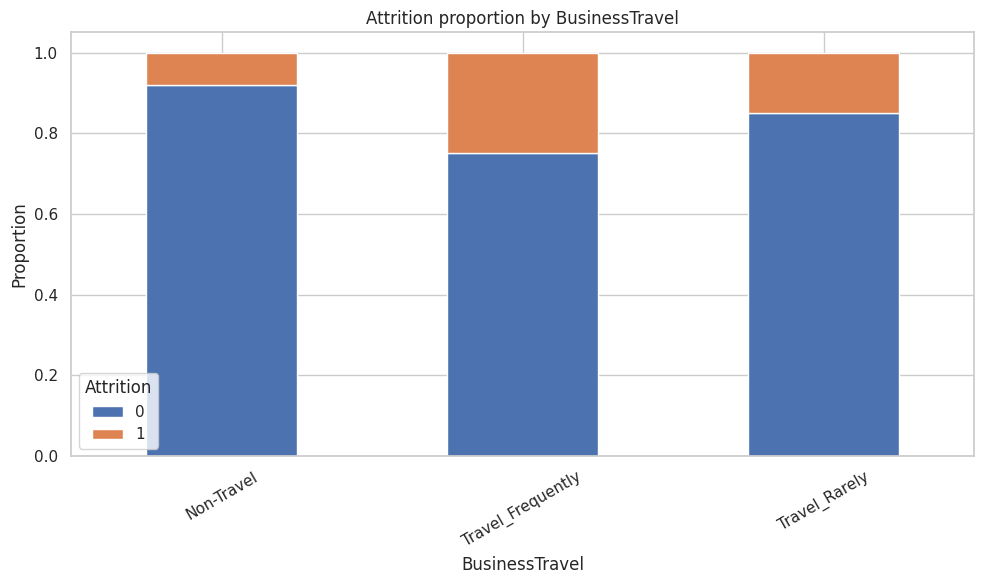


Attrition proportion by Department:


Attrition,0,1
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


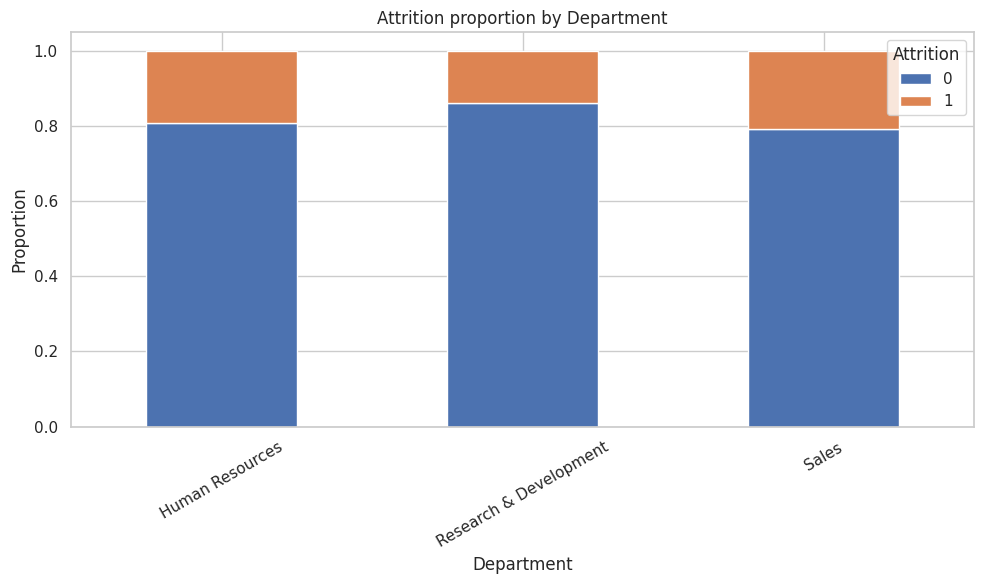


Attrition proportion by EducationField:


Attrition,0,1
EducationField,,
Human Resources,0.740741,0.259259
Life Sciences,0.853135,0.146865
Marketing,0.779874,0.220126
Medical,0.864224,0.135776
Other,0.865854,0.134146
Technical Degree,0.757576,0.242424


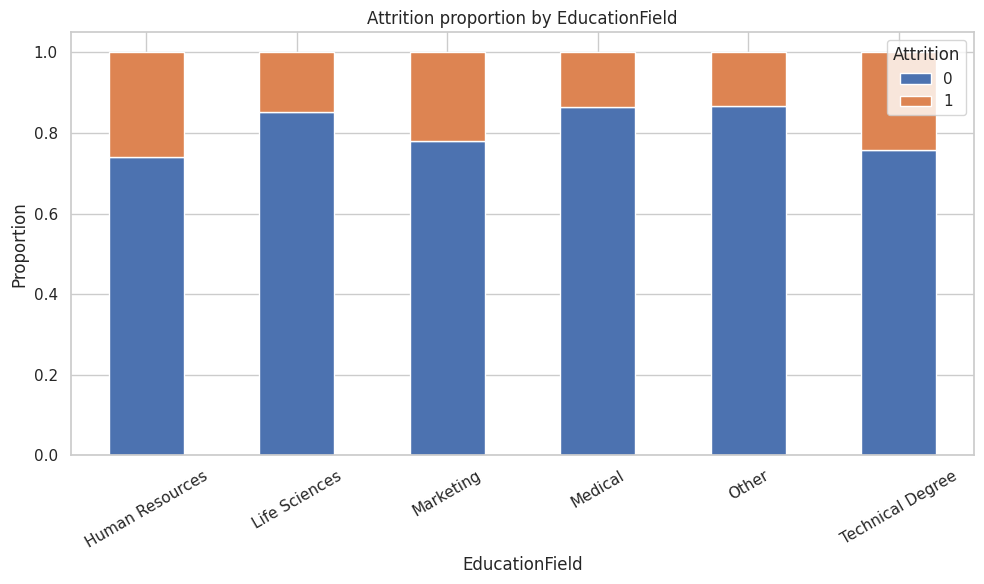


Attrition proportion by Gender:


Attrition,0,1
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068


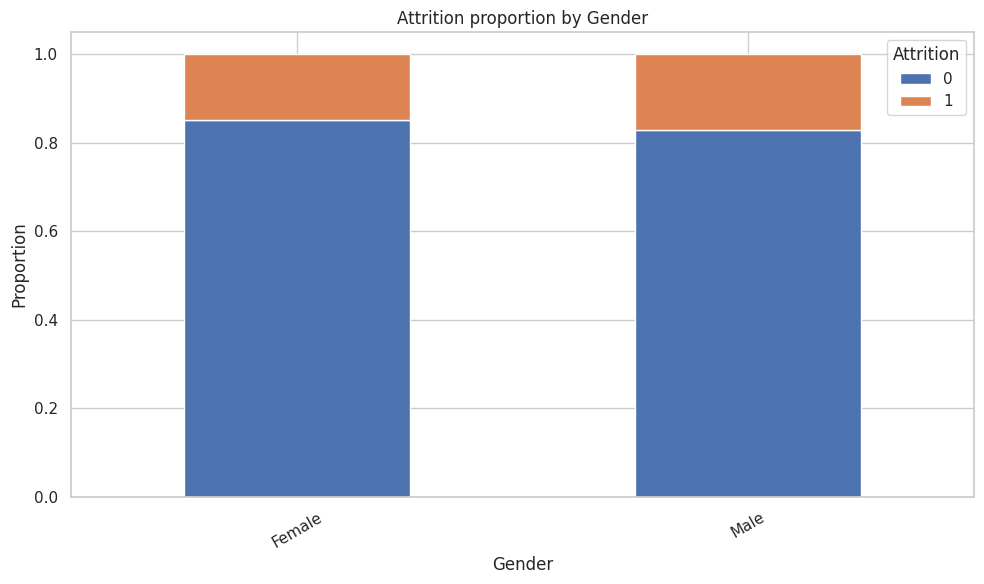


Attrition proportion by JobRole:


Attrition,0,1
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


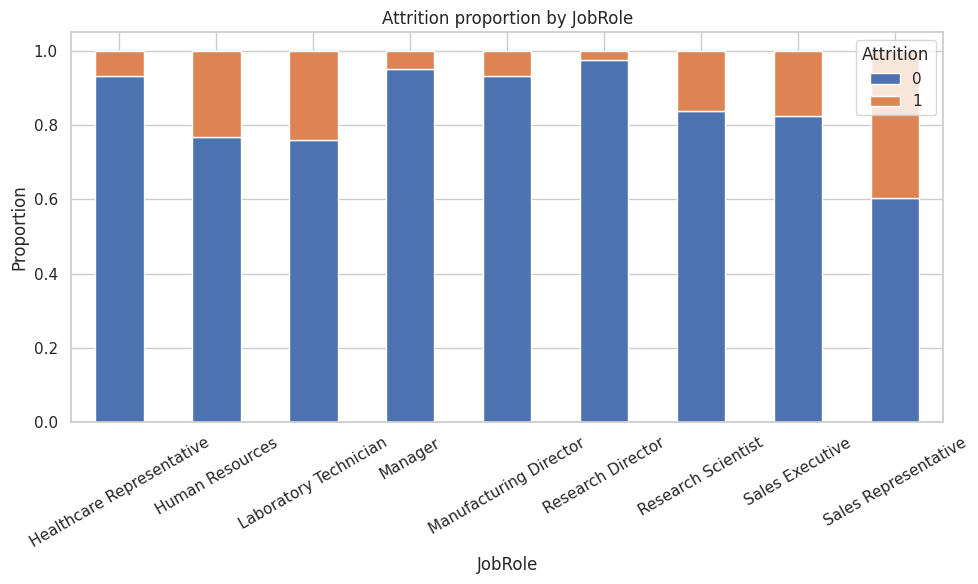


Attrition proportion by MaritalStatus:


Attrition,0,1
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319


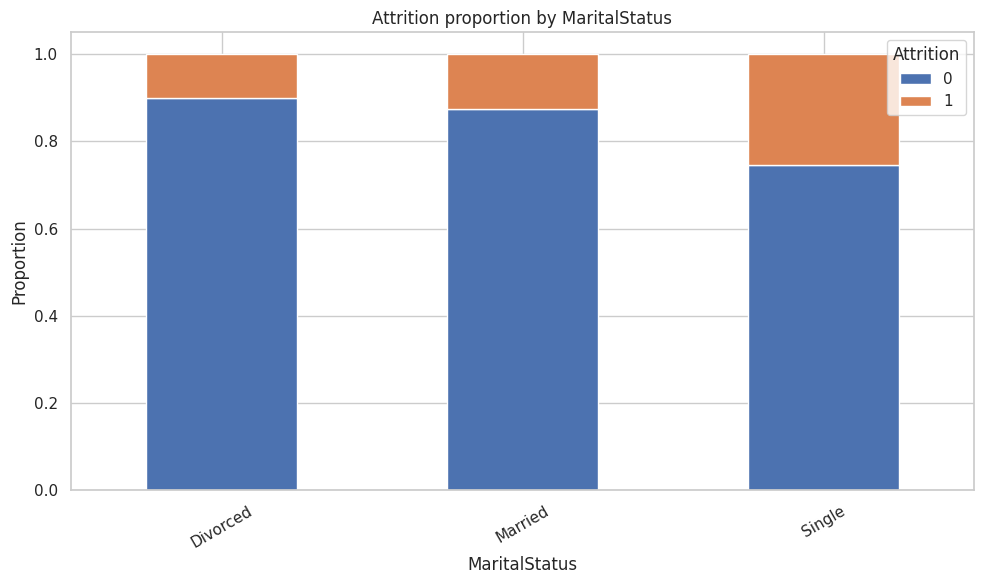


Attrition proportion by OverTime:


Attrition,0,1
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288


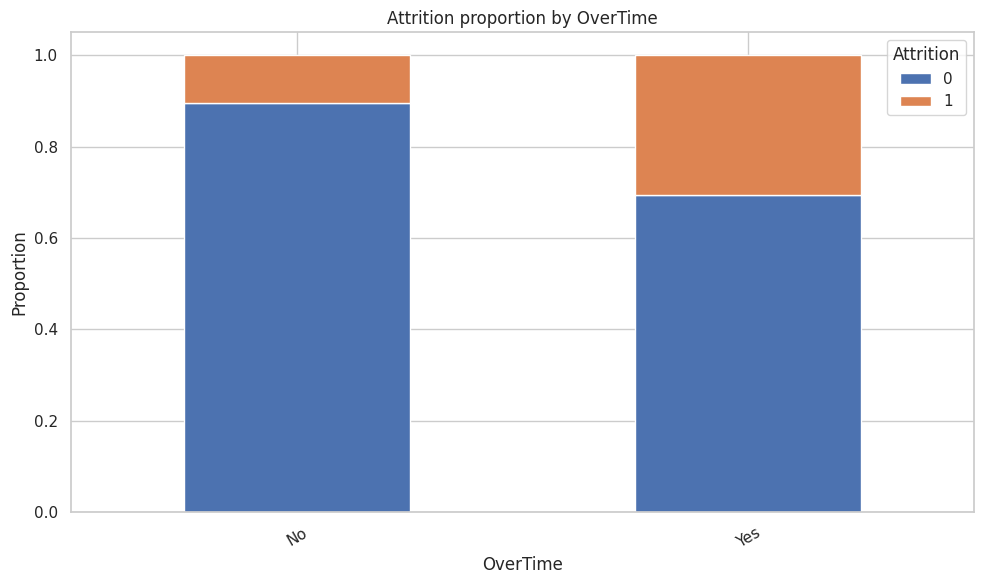

In [30]:
for c in categorical_cols:
    ct = pd.crosstab(df[c], df["Attrition"], normalize="index")
    print(f"\nAttrition proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Attrition proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

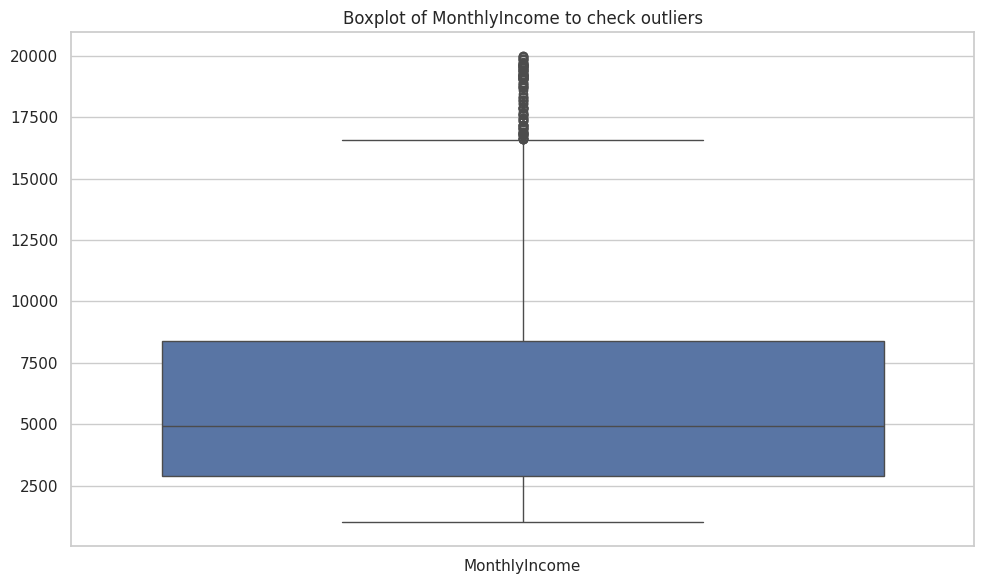

In [31]:
# MonthlyIncome (usually income may have outlier) outlier check
sns.boxplot(data=df[['MonthlyIncome']])
plt.title("Boxplot of MonthlyIncome to check outliers")
plt.tight_layout()
plt.show()

### Preprocessing

In [32]:
# Label encode OverTime (categorical binary columns)
le = LabelEncoder()
if 'OverTime' in categorical_cols:
    categorical_cols.remove('OverTime')
    numeric_cols.append('OverTime')
    df['OverTime'] = le.fit_transform(df['OverTime'])

# Cap MonthlyIncome outlier
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower, upper)


In [33]:
X = df.drop(columns=[target_col])
y = df[target_col]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=random_state,
)

print('Train :',X_train.shape)
print('Test :',X_test.shape)

Train : (1102, 30)
Test : (368, 30)


### Pipeline

In [34]:
# for numerical
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# for categorical
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# combine
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_cols),
        ('cat',cat_transformer,categorical_cols)
    ]
    )

In [35]:
# base learner
clf_lr = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    random_state=random_state
)

clf_rf = RandomForestClassifier(
    n_estimators=500,
    class_weight="balanced",
    random_state=random_state
)

clf_gb = GradientBoostingClassifier(
    n_estimators=200,
    random_state=random_state
)

In [36]:
# voting regressor
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf_lr),
        ('rf', clf_rf),
        ('gb', clf_gb),
    ]
)

# stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', clf_rf),
        ('gb', clf_gb)
    ],
    final_estimator= LogisticRegression(max_iter=1000),
)

In [37]:
# dictionary of all model
model_to_train = {
    "Logistic Regression": clf_lr,
    "Random Forest": clf_rf,
    "Gradient Boosting": clf_gb,
    "Voting Ensemble": voting_clf,
    "Stacking Ensemble": stacking_clf
}

In [38]:
# train and evaluation
results = []

for name , model in model_to_train.items():
    pipe = Pipeline([
          ('preprocessor', preprocessor),
          ('model', model)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    })

results_df = pd.DataFrame(results).sort_values("Recall", ascending=False)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.744565   0.274510  0.583333  0.373333
2    Gradient Boosting  0.877717   0.555556  0.312500  0.400000
4    Stacking Ensemble  0.896739   0.750000  0.312500  0.441176
3      Voting Ensemble  0.875000   0.545455  0.250000  0.342857
1        Random Forest  0.877717   0.800000  0.083333  0.150943


So, **Logistic Regression** is selected as the final model because it achieved the highest recall for employee attrition. Here, recall indicates the proportion of employees who actually leave and were correctly identified by the model. Logistic Regression correctly identifies **58.33%** of employees who actually leave. Although Stacking Ensemble has higher accuracy and much better precision, the main goal for this dataset is to identify employees who leave the company. That's why we choose **Logistic Regression** as the final model.

### Cross Validation

In [39]:
# Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', clf_lr)
])

# 5 fold CV
cv_score = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='recall')

print("Mean recall:", cv_score.mean())

Mean recall: 0.7300142247510668


In [40]:
# Randomized Search CV
param_dist = {
    'model__C': uniform(0.01, 100),
}

random_search = RandomizedSearchCV(
    estimator = lr_pipeline,
    param_distributions = param_dist,
    n_iter=100,
    cv = 5 ,
    scoring='recall', 
    n_jobs =-1,
    verbose = 2,
    random_state = 42
)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................model__C=37.464011884736244; total time=   0.1s
[CV] END ........................model__C=37.464011884736244; total time=   0.1s
[CV] END ........................model__C=37.464011884736244; total time=   0.1s
[CV] END ........................model__C=37.464011884736244; total time=   0.2s
[CV] END .........................model__C=95.08143064099163; total time=   0.1s
[CV] END ........................model__C=37.464011884736244; total time=   0.2s
[CV] END .........................model__C=95.08143064099163; total time=   0.2s
[CV] END .........................model__C=95.08143064099163; total time=   0.1s
[CV] END .........................model__C=95.08143064099163; total time=   0.1s
[CV] END .........................model__C=95.08143064099163; total time=   0.2s
[CV] END .........................model__C=73.20939418114051; total time=   0.1s
[CV] END .........................model__C=73.

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.",{'model__C': <scipy.stats....x791f0660cf50>}
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,

In [41]:
print(random_search.best_params_)
print(random_search.best_score_)

{'model__C': np.float64(2.0684494295802445)}
0.72475106685633


### Save Model

In [42]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=2.0684494295802445,
        random_state=random_state,
        class_weight="balanced",
        max_iter=500
    ))
])

final_pipeline.fit(X_train, y_train)

filename = "employee_lr_model.pkl"

with open(filename, "wb") as file:
    pickle.dump(final_pipeline, file)

with open(filename, "rb") as file:
  loaded_model = pickle.load(file)

### Model Performance Evaluation

Accuracy: 0.7364130434782609
Recall: 0.6041666666666666
Precision: 0.27102803738317754
F1 Score: 0.3741935483870968
Classification_report
               precision    recall  f1-score   support

           0       0.93      0.76      0.83       320
           1       0.27      0.60      0.37        48

    accuracy                           0.74       368
   macro avg       0.60      0.68      0.60       368
weighted avg       0.84      0.74      0.77       368



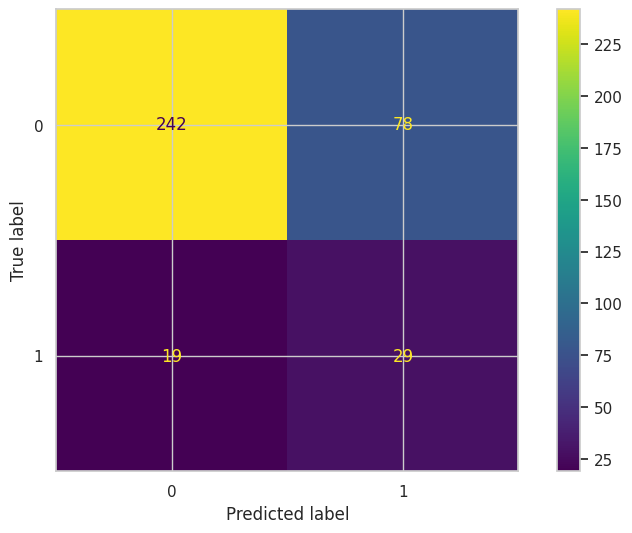

In [43]:
y_pred_save = loaded_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_save)
final_precision = precision_score(y_test, y_pred_save)
final_recall = recall_score(y_test, y_pred_save)
final_f1_score = f1_score(y_test, y_pred_save)
final_confusion_matrix = confusion_matrix(y_test, y_pred_save)

print("Accuracy:", final_accuracy)
print("Recall:", final_recall)
print("Precision:", final_precision)
print("F1 Score:", final_f1_score)
print('Classification_report\n', classification_report(y_test, y_pred_save))
ConfusionMatrixDisplay(confusion_matrix=final_confusion_matrix, display_labels=loaded_model.classes_).plot()


Our final Logistic Regression model correctly identifies **60.4% of employees who leave the company**, and overall model accuracy is **73.64%**.

### Feature importance

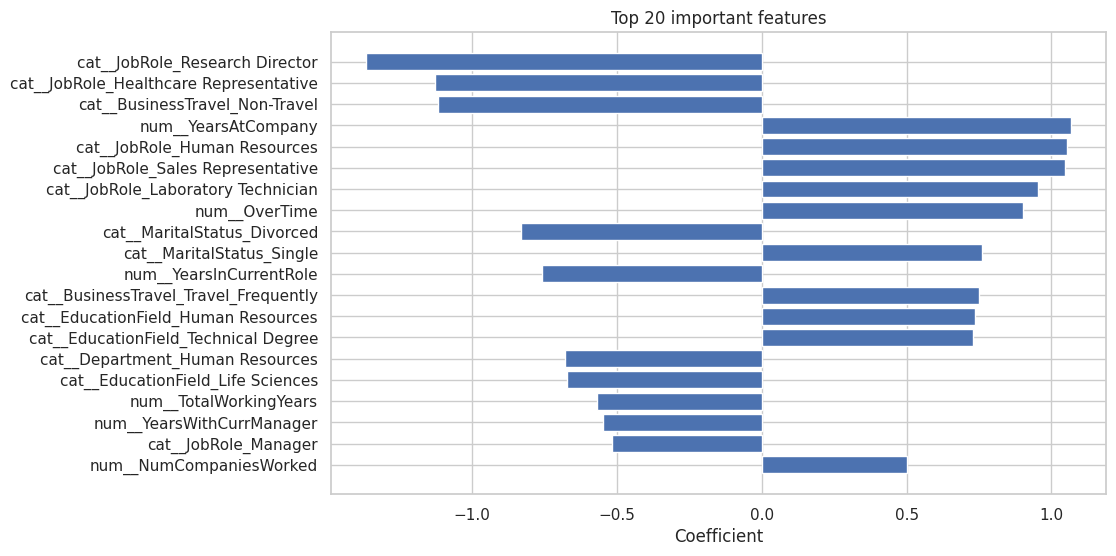

In [44]:
feature_names = loaded_model.named_steps['preprocessor'].get_feature_names_out()
coefficient = loaded_model.named_steps['model'].coef_[0]

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficient,
    'importance': abs(coefficient)
})

sorted_feature_importance = feature_importance.sort_values(by='importance', ascending=False)

top_20 = sorted_feature_importance.head(20)

plt.barh(top_20['feature'], top_20['coefficient'])
plt.xlabel('Coefficient')
plt.title('Top 20 important features')
plt.gca().invert_yaxis()
plt.show()